# **Task 1: Prediction Using Supervised ML**

## **Author: Betabasi Felix Daniel**

### **Task Goal: Predict the percentage score of a student based on the number of study hours.**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Using ggplot style
plt.style.use("ggplot")
# Setting width and height of plot
plt.rcParams['figure.figsize'] = (7, 5)

In [2]:
# Reading the data from a remote link
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('Data imported successfully')

# Displaying the first five rows of the dataset
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Initially, I imported the libraries I will use and then set up my plot style and size. Thereafter, I read the data from a remote link before displaying its first five rows.**

### **Exploratory Data Analysis**

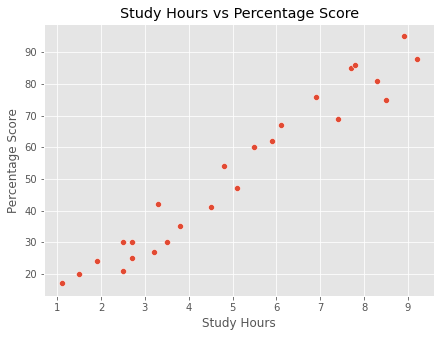

In [3]:
# Plotting scatterplot of study hours against percentage scores
sns.scatterplot(data=df, x='Hours', y='Scores')
plt.title('Study Hours vs Percentage Score')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score');

**I did an exploratory data analysis on the data and from the above plot, it can be seen that there is a positive linear correlation between the study hours and the percentage score.**

### **Preparing the data**

In [4]:
# Extracting the Hours feature
X = df.iloc[:, :-1].values   

# displaying the first five rows
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [5]:
 # Extracting the target variable Scores
y = df.iloc[:, 1].values

In [6]:
# Splitting Dataset into Train & Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        train_size = 0.8, random_state=0)

In [7]:
# Checking the shape of the training set and test set
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


**First, I divided the data into input (attributes) and output (labels). Then, I splitted the data into train and test sets, after which I checked the shape of my train and test sets.**

### **Model Training**

In [8]:
# Training the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [9]:
# Interpreting Model Coefficients
print(linreg.coef_) # model coefficient value
print(linreg.intercept_) # model intercept value

[9.91065648]
2.018160041434662


**I trained the model with linear regression algorithm and thereafter interpreted the model coefficients before making predictions.**

### **Making Predictions**

In [10]:
# Making Predictions with Model
y_pred = linreg.predict(X_test)
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing the Real Score and the Predicted Score
df = pd.DataFrame({'Real':y_test, 'Predicted':y_pred})
df

,Real,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# Predicting the score of a student that studies for 9.25 hours
study_time = 9.25
my_pred = linreg.predict([[9.25]])
print("Hours spent studying: " + str(study_time))
print("Predicted Score: " + str(my_pred[0]))

Hours spent studying: 9.25
Predicted Score: 93.69173248737539


**After training the model, I compared the real score of the students with their predicted score and then predicted the score if a student studies for 9.25 hours per day.**

### **Model Evaluation**

In [13]:
# Model Evaluation
from sklearn import metrics

# Mean Absolute Error
print('Mean Absolute Error: ' + str((metrics.mean_absolute_error(y_test, y_pred))))

# Mean Squared Error
print('Mean Squared Error: ' + str((metrics.mean_squared_error(y_test, y_pred))))

# Root Mean Squared Error
print('Root Mean Squared Error: ' + str((np.sqrt(metrics.mean_squared_error(y_test, y_pred)))))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


**Evaluation of the algorithm's performance is the last phase. This stage is crucial for evaluating how effective various algorithms operate on a certain dataset. I chose the mean absolute error, mean squared error and root mean squared error as the metrics for the model evaluation.**